In [81]:
# All flags in data
from utils.data_processing import EyeTrackingProcessor
from utils.task_data_io import PARQUET_NAME, list_parquet_files

root_dir = "/store/kruu/eye_tracking/training_data"
processor = EyeTrackingProcessor()
file_index = list_parquet_files(root_dir)
dfs, task_map = processor.load_data(file_index, want_columns=["Event", "Recording timestamp [ms]"])
task_bounds = processor.collect_task_boundaries(dfs, export_path="task_boundaries.csv")

ImportError: cannot import name 'PARQUET_NAME' from 'utils.task_data_io' (/home/kruu/git_folder/eye_tracking/utils/task_data_io.py)

In [ ]:
from utils.helper import load_and_process_et

root_dir = "/store/kruu/eye_tracking/training_data"
features = ['Recording timestamp [ms]', 'Gaze point X [DACS px]', 'Gaze point Y [DACS px]', 'Mouse position X', 'Mouse position Y', 'Event']
interpolate_cols = ['Gaze point X [DACS px]', 'Gaze point Y [DACS px]', 'Mouse position X', 'Mouse position Y', "Blink"]
fill_columns = ['Gaze point X [DACS px]', 'Gaze point Y [DACS px]', 'Mouse position X', 'Mouse position Y']

chunks, blinks, atco_task_map  = load_and_process_et(root_dir=root_dir, 
                                                    columns=features, 
                                                    interpolate_cols=interpolate_cols, 
                                                    fill_cols=fill_columns, 
                                                    # time_resampling=True, 
                                                    time_resampling=False,
                                                    fixed_window_ms=None, # Size of the chunk window. None if chunk per task
                                                    window_step_ms=None, # Time step from one window to another. None is no overlap
                                                    # min_task_presence=0.5 # Min proportion of task presence for assigning a label
                                                    )


In [2]:
atco_task_map

{'Aircraft requests': 'Task 0',
 'Assume': 'Task 1',
 'Conflict resolution': 'Task 2',
 'Entry conditions': 'Task 3',
 'Entry conflict resolution': 'Task 4',
 'Entry coordination': 'Task 5',
 'Exit conditions': 'Task 6',
 'Exit conflict resolution': 'Task 7',
 'Exit coordination': 'Task 8',
 'Non-conformance resolution': 'Task 9',
 'QoS': 'Task 10',
 'Return to route': 'Task 11',
 'Transfer': 'Task 12',
 'Zone conflict': 'Task 13'}

In [3]:
len(chunks)

101073

In [12]:
chunks['010_3_-1_5']

,Recording timestamp [ms],Gaze point X [DACS px],Gaze point Y [DACS px],Mouse position X,Mouse position Y,Blink,id,Participant name,Task_id,Task_execution
0,227105,913.625000,588.250000,1110.0,1031.0,True,010_3_-1_5,010,-1,-1
1,227115,913.625000,588.250000,1110.0,1031.0,True,010_3_-1_5,010,-1,-1
2,227125,913.625000,588.250000,1110.0,1031.0,True,010_3_-1_5,010,-1,-1
3,227135,913.625000,588.250000,1110.0,1031.0,True,010_3_-1_5,010,-1,-1
4,227145,913.625000,588.250000,1110.0,1031.0,True,010_3_-1_5,010,-1,-1
...,...,...,...,...,...,...,...,...,...,...
995,237055,1002.000000,39.000000,2121.0,1489.0,False,010_3_-1_5,010,-1,-1
996,237065,995.444444,34.666667,2121.0,1489.0,False,010_3_-1_5,010,-1,-1
997,237075,995.125000,36.250000,2121.0,1489.0,False,010_3_-1_5,010,-1,-1
998,237085,992.000000,34.375000,2121.0,1489.0,False,010_3_-1_5,010,-1,-1


In [4]:
chunks['010_3_5_5'][["Gaze point X [DACS px]", "Gaze point Y [DACS px]", "Mouse position X", "Mouse position Y"]].isna().mean()

Gaze point X [DACS px]    0.0
Gaze point Y [DACS px]    0.0
Mouse position X          0.0
Mouse position Y          0.0
dtype: float64

In [5]:
import pandas as pd
test_010 = pd.read_parquet("/store/kruu/eye_tracking/training_data/010/Scenario 3/taskRecognition/raw_inputs.parquet")
test_010[["Mouse position X", "Mouse position Y"]].isna().mean()

Mouse position X    0.899207
Mouse position Y    0.899207
dtype: float64

In [ ]:
# What to calculate: 
# - Scenarios per particpant
# - Number of total occurences of each task
# - AVG time per task
# - AVG number of nan for gaze/mouse per task

In [ ]:
import numpy as np
from collections import defaultdict, Counter

scenario_per_particpant = defaultdict(list)

for df in chunks.values():
    scenario_id = df["Scenario_id"].iloc[0]
    participant = df["Participant name"].iloc[0]
    if scenario_id not in scenario_per_particpant[participant]:
        scenario_per_particpant[participant].append(scenario_id)

for participant, scenarios in scenario_per_particpant.items():
    print(f"Participant {participant} has completed scenarios {scenarios}")

In [14]:
print("Number of total occurences per task: ")
task_window_counts = Counter(int(df["Task_id"].iloc[0]) for df in chunks.values())
for task_id in sorted(task_window_counts):
    print(f"Task {task_id}: {task_window_counts[task_id]} windows")

Number of total occurences per task: 
Task -1: 69280 windows
Task 0: 2194 windows
Task 1: 5885 windows
Task 2: 2192 windows
Task 3: 285 windows
Task 4: 183 windows
Task 5: 2492 windows
Task 6: 548 windows
Task 7: 98 windows
Task 8: 1717 windows
Task 9: 340 windows
Task 10: 1106 windows
Task 11: 1982 windows
Task 12: 8744 windows
Task 13: 4027 windows


In [15]:
durations_by_task = defaultdict(list)

for df in chunks.values():
    task_id = int(df["Task_id"].iloc[0])

    ts_col = "Recording timestamp [ms]"
    ts = df[ts_col].astype(float)
    dur_ms = float(ts.max() - ts.min())

    durations_by_task[task_id].append(dur_ms)

# avg_ms_by_task = {task: float(np.median(durs)) for task, durs in durations_by_task.items()}
avg_ms_by_task = {task: float(np.quantile(durs, 0.5)) for task, durs in durations_by_task.items()}

for task_id in sorted(avg_ms_by_task):
    print(f"Task {task_id}: {avg_ms_by_task[task_id]:.1f} ms ({avg_ms_by_task[task_id]/1000:.3f} s)")

Task -1: 9990.0 ms (9.990 s)
Task 0: 9990.0 ms (9.990 s)
Task 1: 9990.0 ms (9.990 s)
Task 2: 9990.0 ms (9.990 s)
Task 3: 9990.0 ms (9.990 s)
Task 4: 9990.0 ms (9.990 s)
Task 5: 9990.0 ms (9.990 s)
Task 6: 9990.0 ms (9.990 s)
Task 7: 9990.0 ms (9.990 s)
Task 8: 9990.0 ms (9.990 s)
Task 9: 9990.0 ms (9.990 s)
Task 10: 9990.0 ms (9.990 s)
Task 11: 9990.0 ms (9.990 s)
Task 12: 9990.0 ms (9.990 s)
Task 13: 9990.0 ms (9.990 s)


Find a suitable prediction refreshment: It should be long enough for being able to recognise a task and an acceptable performance, but short enough so that the refreshing is frequent enough. 

10s seem a good start 

In [10]:
gazeX_nans_by_task = defaultdict(list)
gazeY_nans_by_task = defaultdict(list)
mouseX_nans_by_task = defaultdict(list)
mouseY_nans_by_task = defaultdict(list)

for df in chunks.values():
    task_id = int(df["Task_id"].iloc[0])

    gazeX = df["Gaze point X [DACS px]"].isna().mean()
    gazeY = df["Gaze point Y [DACS px]"].isna().mean()
    mouseX = df["Mouse position X"].isna().mean()
    mouseY = df["Mouse position Y"].isna().mean()

    gazeX_nans_by_task[task_id].append(gazeX)
    gazeY_nans_by_task[task_id].append(gazeY)
    mouseX_nans_by_task[task_id].append(mouseX)
    mouseY_nans_by_task[task_id].append(mouseY)

avg_nans_gazeX_by_task = {task: float(np.mean(nans)) for task, nans in gazeX_nans_by_task.items()}
avg_nans_gazeY_by_task = {task: float(np.mean(nans)) for task, nans in gazeY_nans_by_task.items()}
avg_nans_mouseX_by_task = {task: float(np.mean(nans)) for task, nans in mouseX_nans_by_task.items()}
avg_nans_mouseY_by_task = {task: float(np.mean(nans)) for task, nans in mouseY_nans_by_task.items()}

print("Average nan proportion per column and per task")
for task_id in sorted(avg_nans_gazeX_by_task):
    print(f"Task {task_id}: Gaze X {avg_nans_gazeX_by_task[task_id]:.3f}, Gaze Y -> {avg_nans_gazeY_by_task[task_id]:.3f}, Mouse X -> {avg_nans_mouseX_by_task[task_id]:.3f}, Mouse Y -> {avg_nans_mouseY_by_task[task_id]:.3f}")

Average nan proportion per column and per task
Task 0: Gaze X 0.155, Gaze Y -> 0.155, Mouse X -> 0.924, Mouse Y -> 0.924
Task 1: Gaze X 0.164, Gaze Y -> 0.164, Mouse X -> 0.924, Mouse Y -> 0.924
Task 2: Gaze X 0.177, Gaze Y -> 0.177, Mouse X -> 0.915, Mouse Y -> 0.915
Task 3: Gaze X 0.246, Gaze Y -> 0.246, Mouse X -> 0.920, Mouse Y -> 0.920
Task 4: Gaze X 0.273, Gaze Y -> 0.273, Mouse X -> 0.932, Mouse Y -> 0.932
Task 5: Gaze X 0.303, Gaze Y -> 0.303, Mouse X -> 0.924, Mouse Y -> 0.924
Task 6: Gaze X 0.234, Gaze Y -> 0.234, Mouse X -> 0.921, Mouse Y -> 0.921
Task 7: Gaze X 0.211, Gaze Y -> 0.211, Mouse X -> 0.923, Mouse Y -> 0.923
Task 8: Gaze X 0.293, Gaze Y -> 0.293, Mouse X -> 0.920, Mouse Y -> 0.920
Task 9: Gaze X 0.193, Gaze Y -> 0.193, Mouse X -> 0.930, Mouse Y -> 0.930
Task 10: Gaze X 0.114, Gaze Y -> 0.114, Mouse X -> 0.911, Mouse Y -> 0.911
Task 11: Gaze X 0.117, Gaze Y -> 0.117, Mouse X -> 0.922, Mouse Y -> 0.922
Task 12: Gaze X 0.353, Gaze Y -> 0.353, Mouse X -> 0.923, Mouse

015_2_1_12


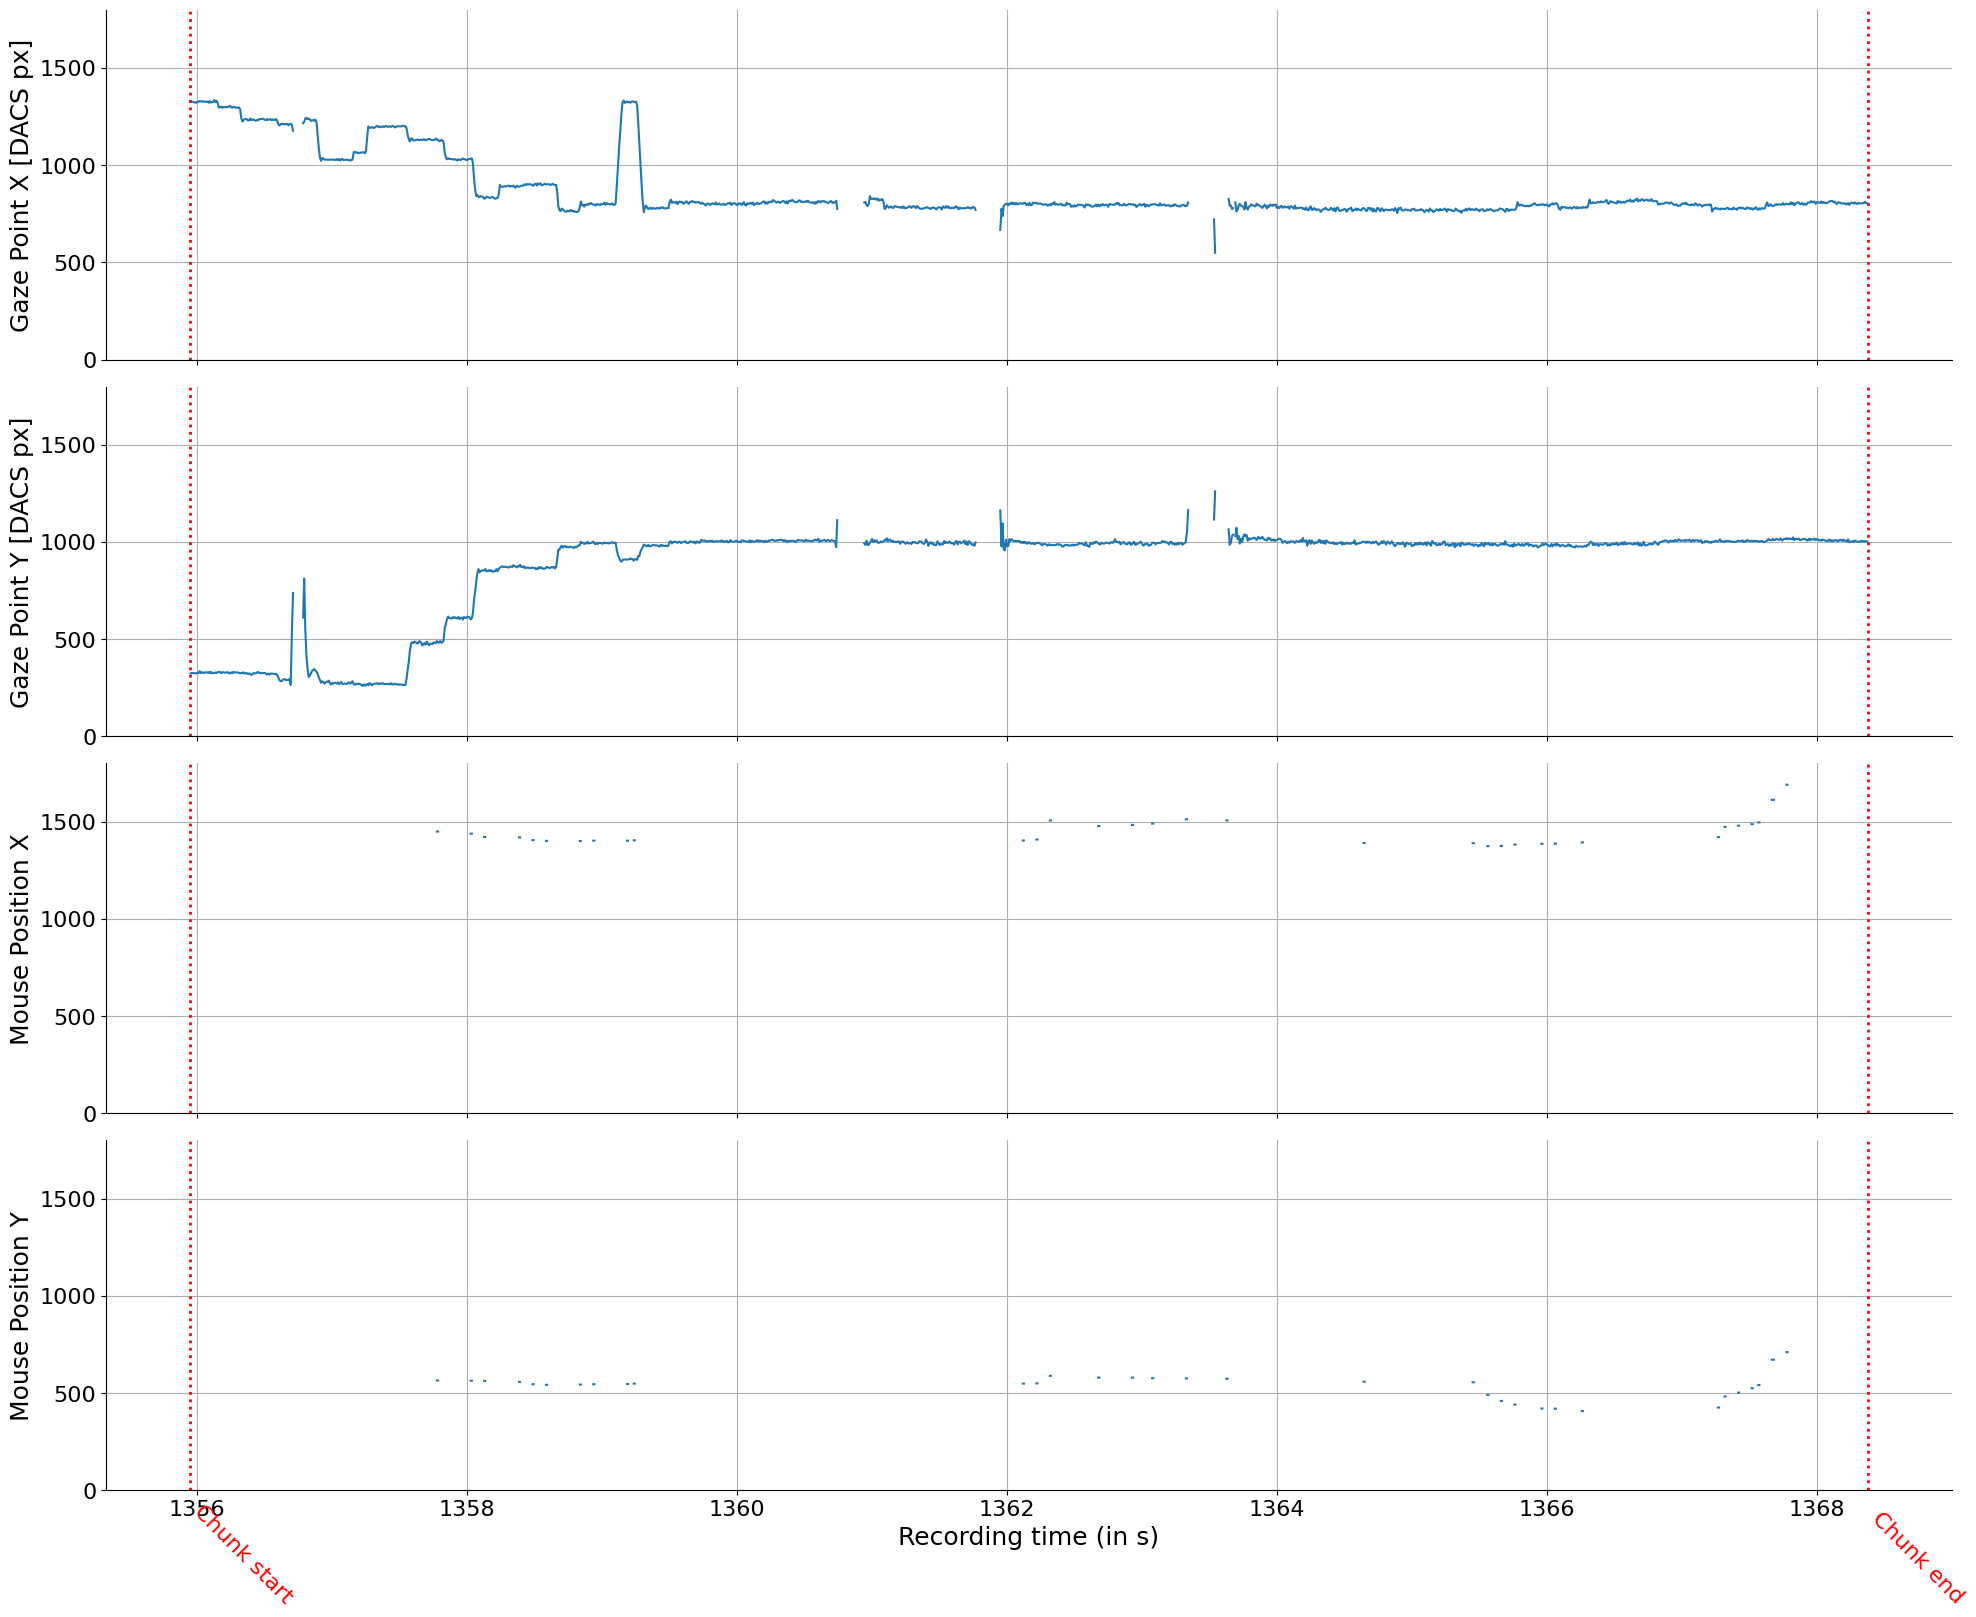

In [11]:
import matplotlib.pyplot as plt
import random

id_task = random.choice(list(chunks.keys()))
print(id_task)
task_plot = chunks[id_task]

fig, axs = plt.subplots(4, 1, figsize=(20, 16), sharex=True)
# Convert timestamps to seconds
timestamps_sec = task_plot["Recording timestamp [ms]"] / 1e3
start_time_sec = task_plot.iloc[0]["Recording timestamp [ms]"] / 1e3
end_time_sec = task_plot.iloc[-1]["Recording timestamp [ms]"] / 1e3

# Titles for each subplot
titles = ['Gaze Point X [DACS px]', 'Gaze Point Y [DACS px]', 'Mouse Position X', 'Mouse Position Y']
data_columns = ['Gaze point X [DACS px]', 'Gaze point Y [DACS px]', 'Mouse position X', 'Mouse position Y']

# Plot each subplot
for ax, title, col in zip(axs, titles, data_columns):
    ax.plot(timestamps_sec, task_plot[col], label=title)
    ax.axvline(x=start_time_sec, color='red', linestyle=':', linewidth=2)
    ax.axvline(x=end_time_sec, color='red', linestyle=':', linewidth=2)
    ax.set_ylim(0, 1800)
    ax.set_ylabel(title)
    ax.grid(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Add labels directly to vertical lines on the top subplot only
axs[-1].text(start_time_sec, -600, 'Chunk start', color='red', rotation=-45, verticalalignment='bottom', fontsize = 16)
axs[-1].text(end_time_sec, -600, 'Chunk end', color='red', rotation=-45, verticalalignment='bottom', fontsize = 16)

# X-axis label on the last subplot
axs[-1].set_xlabel('Recording time (in s)', fontsize = 18)

for ax in axs:
    ax.tick_params(axis='both', labelsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)

plt.tight_layout()
plt.show()